<a href="https://colab.research.google.com/github/abunchoftigers/Prediction-of-Product-Sales/blob/main/Prediction_of_Product_Sales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Prediction of Product Sales

- Author David Dyer


## Project Overview

In [385]:
from google.colab import drive
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [386]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Load and Inspect Data

In [387]:
fpath = '/content/drive/MyDrive/Coding Dojo - Data Science/Week 2/Data/sales_predictions_2023.csv'
df = pd.read_csv(fpath)

In [388]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [389]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


## Clean Data

First let's learn some things about our data.

In [390]:
print(f'{df.shape[0]} rows\n{df.shape[1]} columns')

8523 rows
12 columns


In [391]:
df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [392]:
df.duplicated().value_counts(), df.duplicated().sum() # Hooray no duplicates!

(False    8523
 dtype: int64,
 0)

In [393]:
pd.isna(df).sum() # Some weights and outlet sizes are missing

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

We'll replace missing string types with 'MISSING', and missing numeric types with -1.

In [394]:
# Check the dtype of every column
df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [395]:
df.select_dtypes('object') # Placeholder 'MISSING' looks ok for Outlet_Size

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDA15,Low Fat,Dairy,OUT049,Medium,Tier 1,Supermarket Type1
1,DRC01,Regular,Soft Drinks,OUT018,Medium,Tier 3,Supermarket Type2
2,FDN15,Low Fat,Meat,OUT049,Medium,Tier 1,Supermarket Type1
3,FDX07,Regular,Fruits and Vegetables,OUT010,NaN,Tier 3,Grocery Store
4,NCD19,Low Fat,Household,OUT013,High,Tier 3,Supermarket Type1
...,...,...,...,...,...,...,...
8518,FDF22,Low Fat,Snack Foods,OUT013,High,Tier 3,Supermarket Type1
8519,FDS36,Regular,Baking Goods,OUT045,NaN,Tier 2,Supermarket Type1
8520,NCJ29,Low Fat,Health and Hygiene,OUT035,Small,Tier 2,Supermarket Type1
8521,FDN46,Regular,Snack Foods,OUT018,Medium,Tier 3,Supermarket Type2


In [396]:
# Fill in missing string values
obj_cols = df.select_dtypes(include='object').columns
df[obj_cols] = df[obj_cols].fillna(value='MISSING')
# Fill in missing numeric values
num_cols = df.select_dtypes(include='number').columns
df[num_cols] = df[num_cols].fillna(value=-1)

In [397]:
# Are there still nulls?
pd.isna(df).sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

Now let's find and fix any inconsistent categories.

In [398]:
string_cols = df.select_dtypes('object').columns
string_cols
line_break = "\n"

for col in string_cols:
  print(f'Value Counts for {col}: ')
  print(df[col].value_counts())
  print('\n')

Value Counts for Item_Identifier: 
FDW13    10
FDG33    10
NCY18     9
FDD38     9
DRE49     9
         ..
FDY43     1
FDQ60     1
FDO33     1
DRF48     1
FDC23     1
Name: Item_Identifier, Length: 1559, dtype: int64


Value Counts for Item_Fat_Content: 
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64


Value Counts for Item_Type: 
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64


Value Counts for Outlet_Identifier: 
OUT027    935
OUT013    932
OUT049    930
OUT046

Item_Fat_Content can use some cleaning. First, we'll create a map of the inconsistently formatted values to the correctly formatted values.

In [399]:
item_fat_map = {
    'LF': 'Low Fat',
    'low fat': 'Low Fat',
    'reg': 'Regular'
}

Now we update our data frame with the cleaned values

In [400]:
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace(item_fat_map)

In [401]:
# Make sure it worked
df['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

Let's take a look at some statistical summaries for each numeric column.

In [402]:
for col in df[num_cols]:
  print(f'{col:} {line_break} Lowest:  {df[col].min()}{line_break} Highest: {df[col].max()}{line_break} Mean:    {df[col].mean()}{line_break}')

Item_Weight 
 Lowest:  -1.0
 Highest: 21.35
 Mean:    10.478936407368296

Item_Visibility 
 Lowest:  0.0
 Highest: 0.328390948
 Mean:    0.06613202877895108

Item_MRP 
 Lowest:  31.29
 Highest: 266.8884
 Mean:    140.9927819781767

Outlet_Establishment_Year 
 Lowest:  1985
 Highest: 2009
 Mean:    1997.8318667135984

Item_Outlet_Sales 
 Lowest:  33.29
 Highest: 13086.9648
 Mean:    2181.288913575032



## Exploratory Data Analysis

# Histograms for numeric data

In [403]:
num_cols

Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year', 'Item_Outlet_Sales'],
      dtype='object')



```
# This is formatted as code
```

## Item_Weight

<Axes: xlabel='Item_Weight', ylabel='Count'>

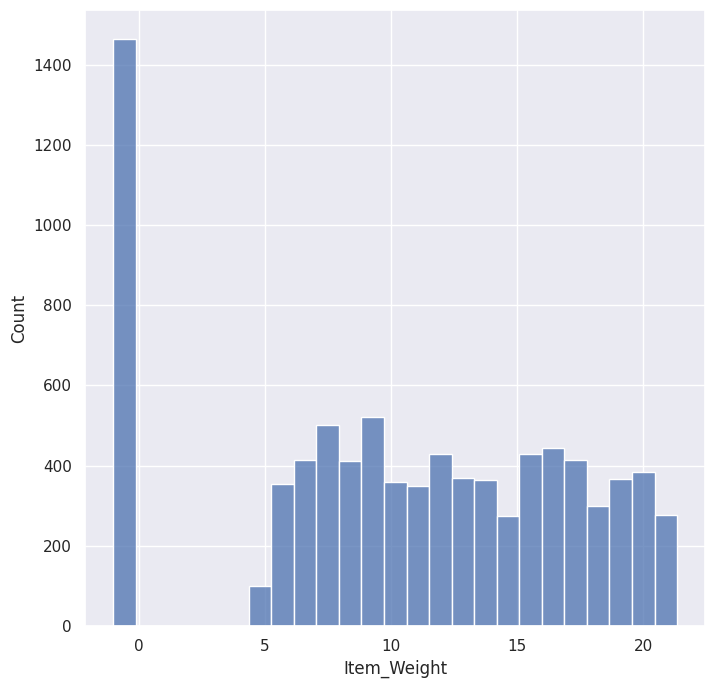

In [404]:
sns.histplot(data=df, x='Item_Weight')

## Item_Visibility

<Axes: xlabel='Item_Visibility', ylabel='Count'>

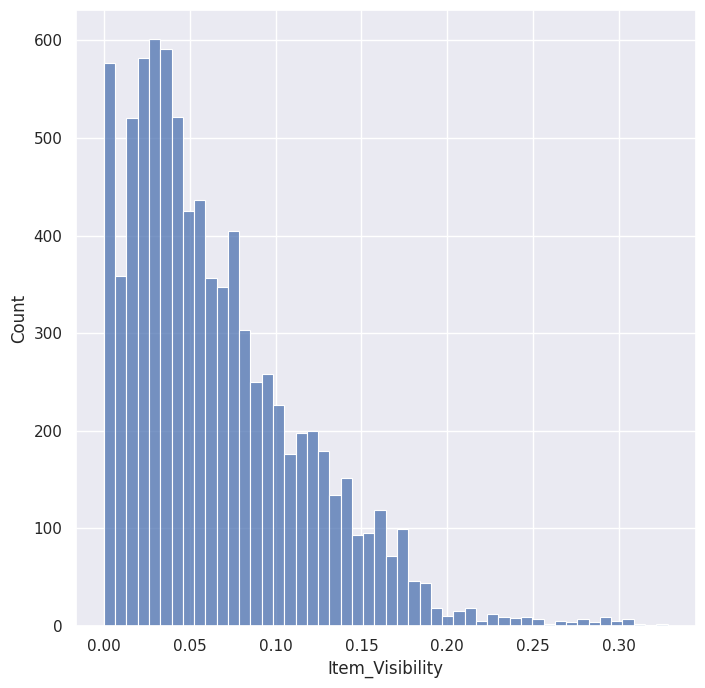

In [405]:
sns.histplot(data=df, x='Item_Visibility')

## Item_MRP

<Axes: xlabel='Item_MRP', ylabel='Count'>

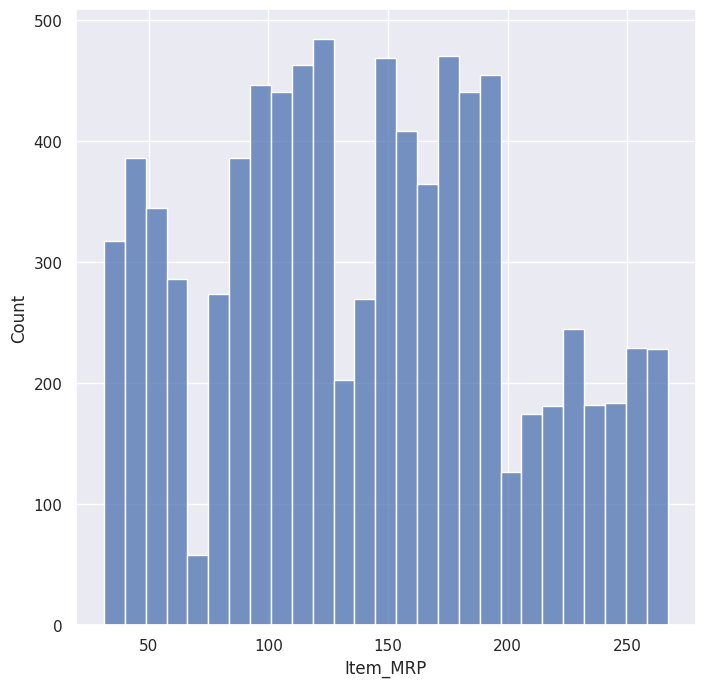

In [406]:
sns.histplot(data=df, x='Item_MRP')

## Outlet_Establishment_Year

<Axes: xlabel='Outlet_Establishment_Year', ylabel='Count'>

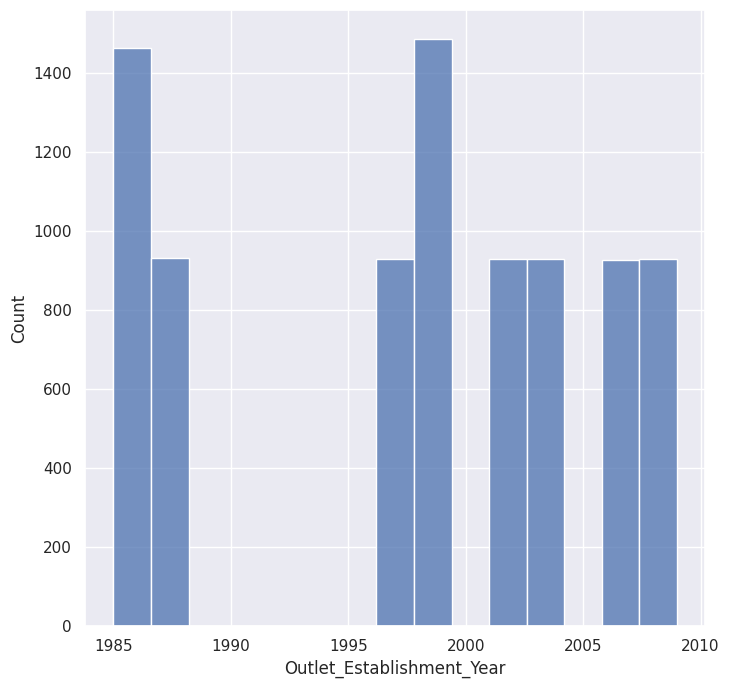

In [407]:
sns.histplot(data=df, x='Outlet_Establishment_Year')

## Item_Outlet_Sales

<Axes: xlabel='Item_Outlet_Sales', ylabel='Count'>

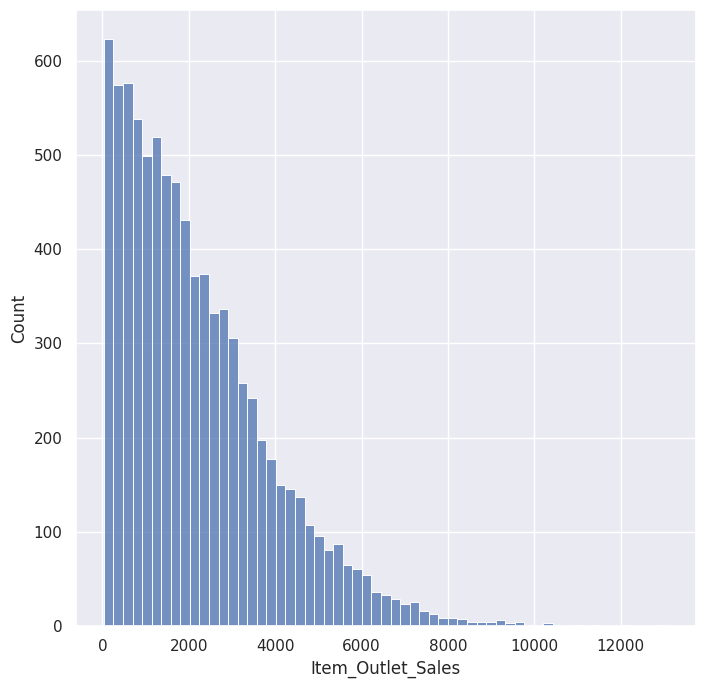

In [408]:
sns.histplot(data=df, x='Item_Outlet_Sales')

# Boxplots: View statistical summaries of numerical features

In [409]:
df.set_index('Item_Identifier')

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
Item_Identifier,,,,,,,,,,,
FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,MISSING,Tier 3,Grocery Store,732.3800
NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...
FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,MISSING,Tier 2,Supermarket Type1,549.2850
NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136


## Item_Weight
sns.boxplot(data=df, x='Item_Weight')

<Axes: xlabel='Item_Weight'>

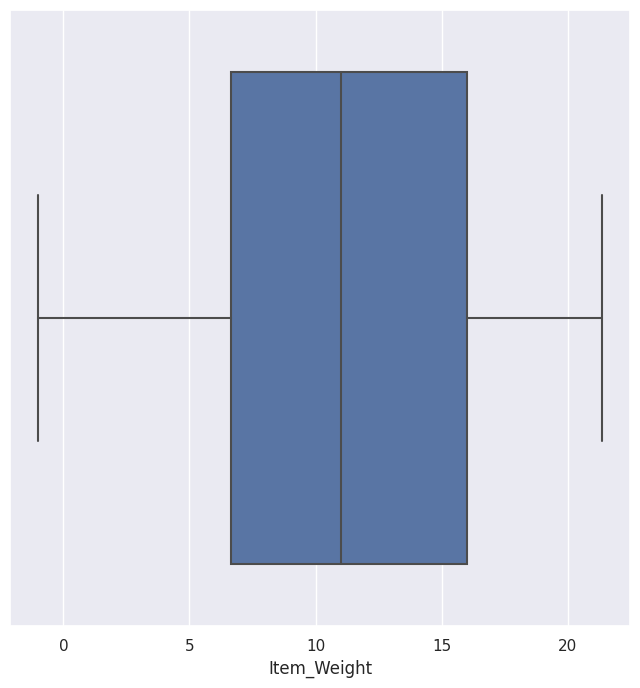

In [410]:
sns.boxplot(data=df, x='Item_Weight')

## Item_Visibility

<Axes: xlabel='Item_Visibility'>

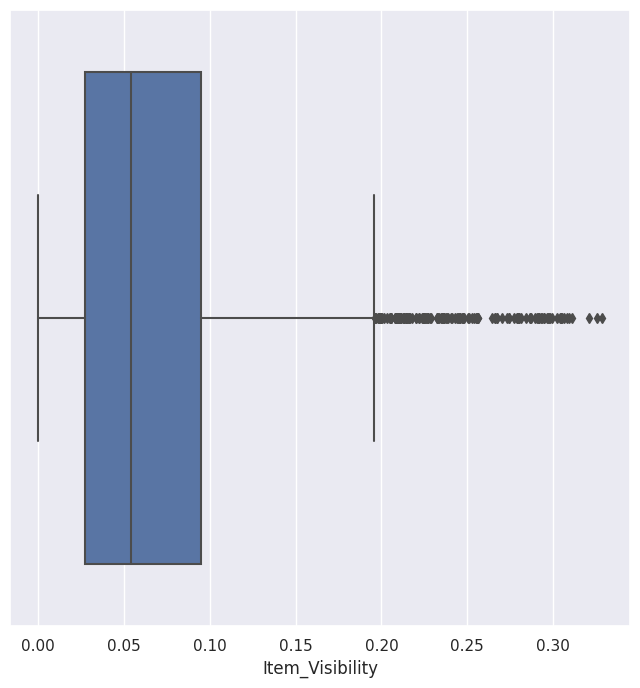

In [411]:
sns.boxplot(data=df, x='Item_Visibility')

## Item_MRP

<Axes: xlabel='Item_MRP'>

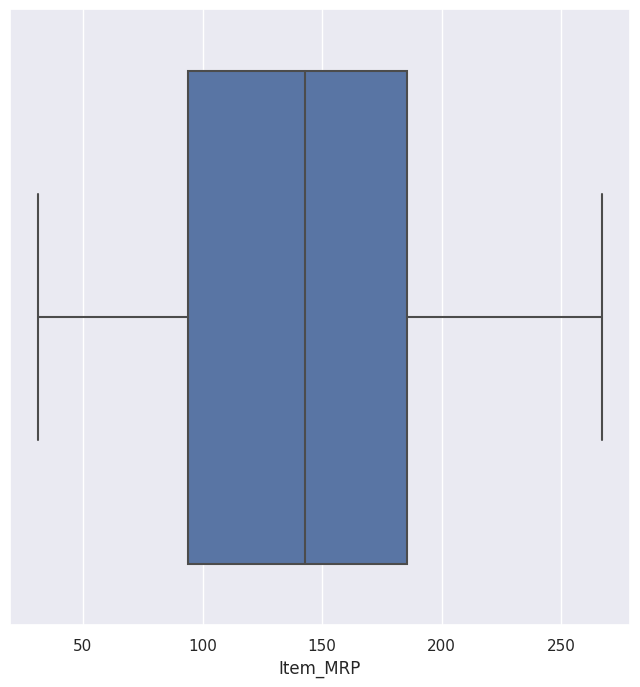

In [412]:
sns.boxplot(data=df, x='Item_MRP')

## Outlet_Establishment_Year

<Axes: xlabel='Outlet_Establishment_Year'>

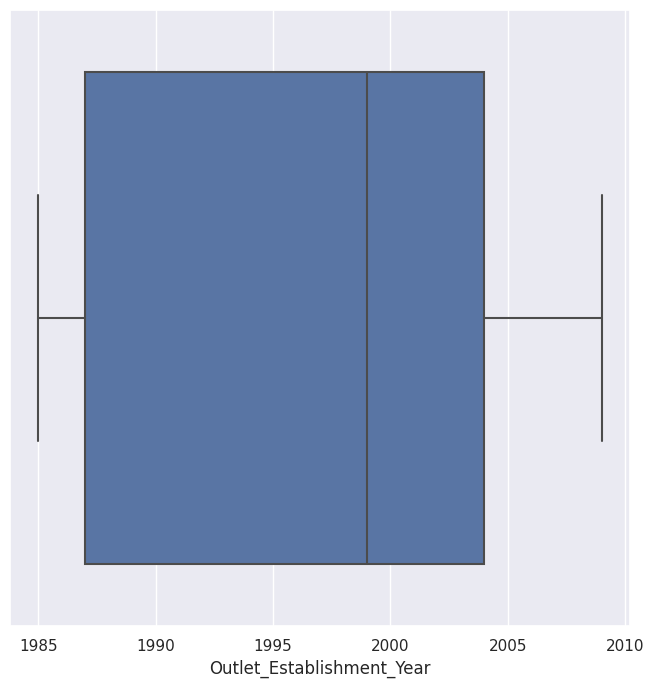

In [413]:
sns.boxplot(data=df, x='Outlet_Establishment_Year')

## Item_Outlet_Sales

<Axes: xlabel='Item_Outlet_Sales'>

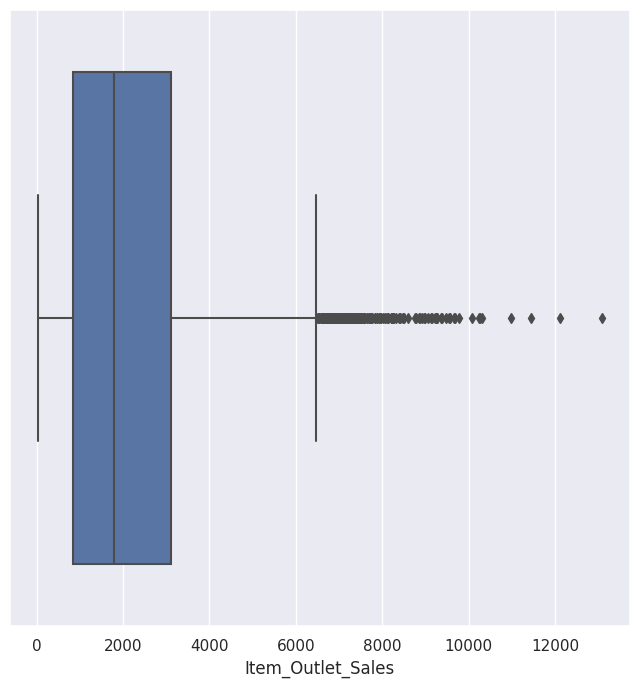

In [414]:
sns.boxplot(data=df, x='Item_Outlet_Sales')

# Countplots: Frequencies of Catagorical Features

## Item_Fat_Content

<Axes: xlabel='Item_Fat_Content', ylabel='count'>

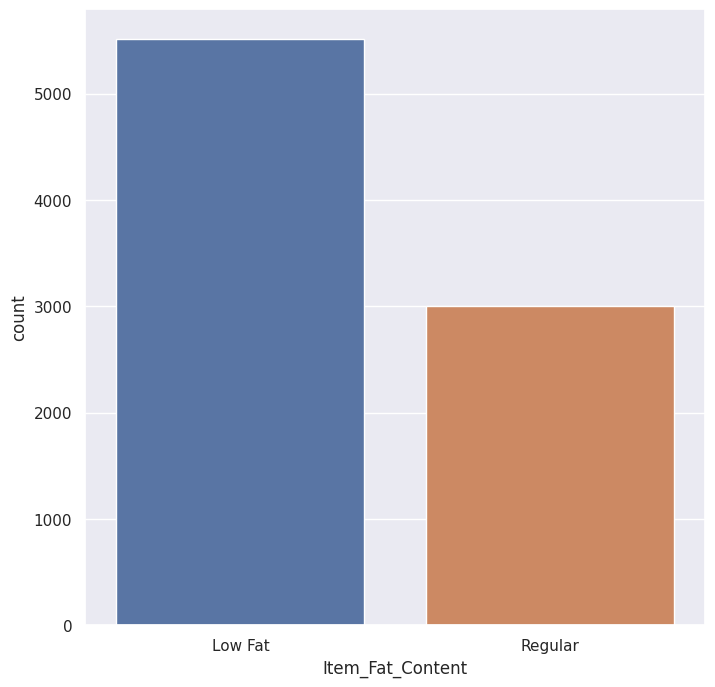

In [415]:
sns.countplot(data=df, x='Item_Fat_Content')

## Item_Type

[Text(0, 0, 'Dairy'),
 Text(1, 0, 'Soft Drinks'),
 Text(2, 0, 'Meat'),
 Text(3, 0, 'Fruits and Vegetables'),
 Text(4, 0, 'Household'),
 Text(5, 0, 'Baking Goods'),
 Text(6, 0, 'Snack Foods'),
 Text(7, 0, 'Frozen Foods'),
 Text(8, 0, 'Breakfast'),
 Text(9, 0, 'Health and Hygiene'),
 Text(10, 0, 'Hard Drinks'),
 Text(11, 0, 'Canned'),
 Text(12, 0, 'Breads'),
 Text(13, 0, 'Starchy Foods'),
 Text(14, 0, 'Others'),
 Text(15, 0, 'Seafood')]

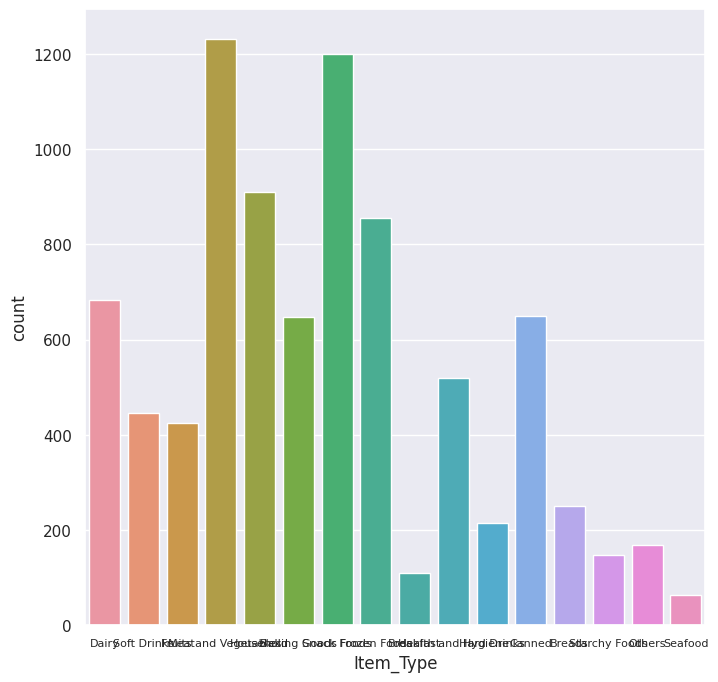

In [416]:
ax = sns.countplot(data=df, x='Item_Type')
sns.set(rc={'figure.figsize':(20, 8)})
ax.set_xticklabels(ax.get_xticklabels(), fontsize=8)

## Outlet_Identifier

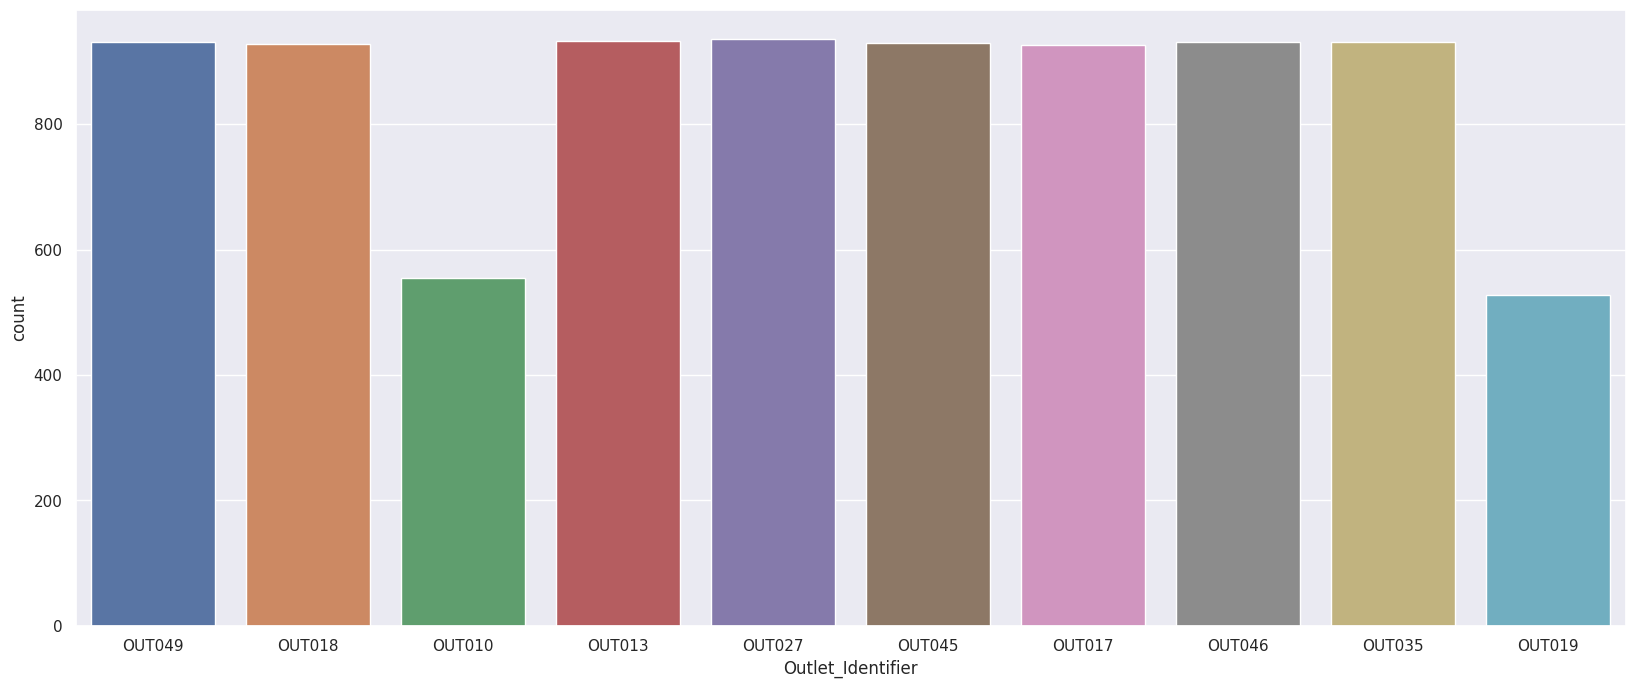

In [417]:
sns.countplot(data=df, x='Outlet_Identifier')
sns.set(rc={'figure.figsize':(8, 4)})

## Outlet_Size

<Axes: xlabel='Outlet_Size', ylabel='count'>

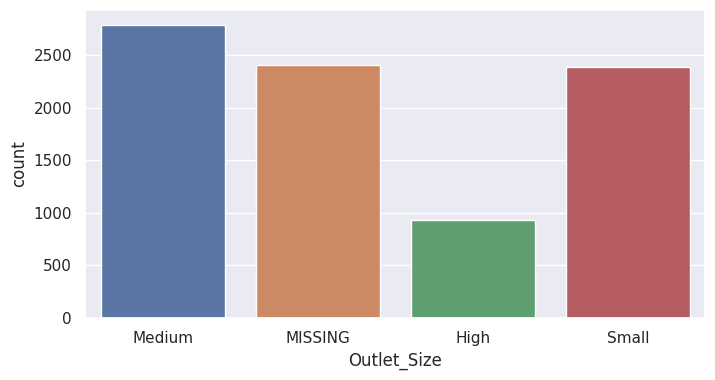

In [418]:
sns.countplot(data=df, x='Outlet_Size')

## Outlet_Location_Type

<Axes: xlabel='Outlet_Location_Type', ylabel='count'>

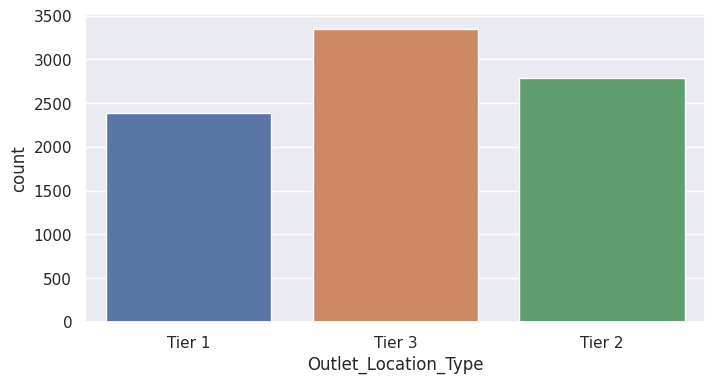

In [419]:
sns.countplot(data=df, x='Outlet_Location_Type')

## Outlet_Type

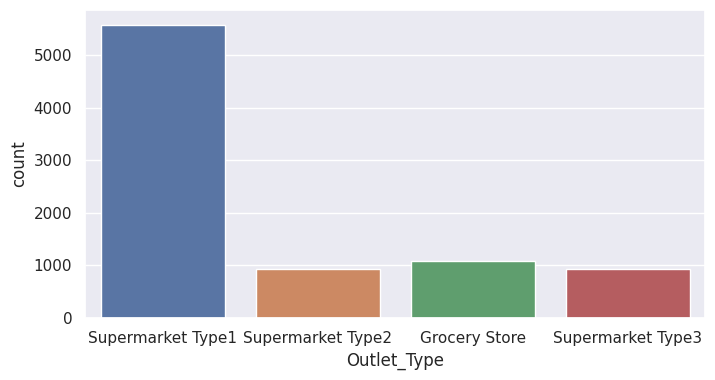

In [420]:
sns.countplot(data=df, x='Outlet_Type')
sns.set(rc={'figure.figsize':(8, 8)})

In [421]:
obj_cols

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')

## Heatmap: Corellations

<ipython-input-422-c0c7406231a7>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


<Axes: >

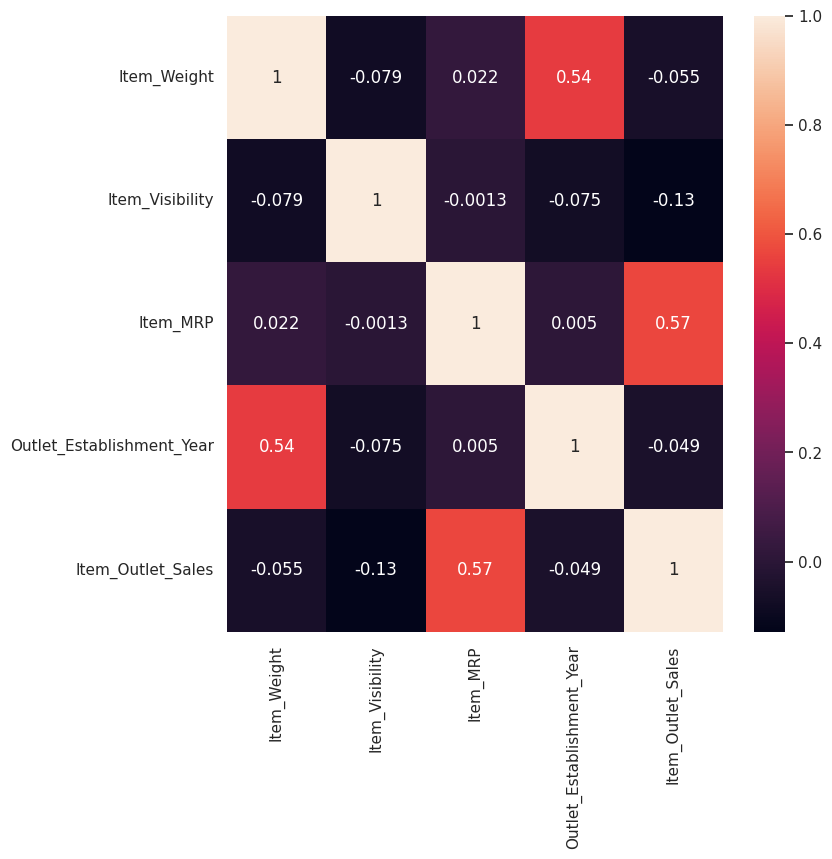

In [422]:
corr = df.corr()
sns.heatmap(corr, annot=True)

# Part 4

# Feature Inspection

In [423]:
# First, let's replace the placeholders we added with nulls
df[obj_cols] = df[obj_cols].replace('MISSING', None)
df[obj_cols]

df[num_cols] = df[num_cols].replace(-1, None)
df[num_cols]

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
0,9.3,0.016047,249.8092,1999,3735.1380
1,5.92,0.019278,48.2692,2009,443.4228
2,17.5,0.016760,141.6180,1999,2097.2700
3,19.2,0.000000,182.0950,1998,732.3800
4,8.93,0.000000,53.8614,1987,994.7052
...,...,...,...,...,...
8518,6.865,0.056783,214.5218,1987,2778.3834
8519,8.38,0.046982,108.1570,2002,549.2850
8520,10.6,0.035186,85.1224,2004,1193.1136
8521,7.21,0.145221,103.1332,2009,1845.5976


1. Add a new markdown header.
2. Paste the feature's definition from the data dictionary into a markdown cell.
3. Create a univariate visualization showing the distribution of values/categories.
You may use the EDA functions from the previous lessons or create your own visualizations.
4. Answer the following questions from the Feature Inspection lesson in a markdown cell:
  - What type of feature is it? (Categorical (nominal), ordinal, numeric)

  - How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? If impute, with what?)

  - Is the feature constant or quasi-constant?
  - What is the cardinality? Is it high (>10)?
  - Would we know this feature before the target is determined?
  - Is there a business case/understanding reason to exclude based on our business case?
  - Create a multivariate visualization plotting each feature vs. the target.
  - You may use the EDA functions from the previous lessons or create your own visualizations.​
5. Answer the following questions from the Feature Inspection lesson in a Markdown cell:
  - Based on your business understanding, would you expect this feature to be a predictor of the target?
  - Does this feature appear to be a predictor of the target?

In [424]:
df.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [425]:
def get_next_column():
  n = 0;
  cols = list(df.columns)
  while n < len(cols):
    yield df[cols[n]]
    n += 1
  raise StopIteration('Out of columns')


In [426]:

def eda_answers(f):
  fdata = {
  'name' : f.name,
  'dtype' : f.dtype,
  'nulls' : f.isna().value_counts(),
  'constant' : f.nunique() == 1,
  'quasi_constant' : f.value_counts().filter(items = f.mode()) / len(f) >= .98,
  'cardinality' : f.nunique(),
  'high_cardinality' : f.nunique() > 10,
  'known_before' : "",
  'business_reason_to_exclude' : ""
  }
  [print(f'{key}: {val}') for key,val in fdata.items()]

* What type of feature is it? (Categorical (nominal), ordinal, numeric)

Nominal

* How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? If impute, with what?)



* Is the feature constant or quasi-constant?



* What is the cardinality? Is it high (>10)?



* Would we know this feature before the target is determined?



* Is there a business case/understanding reason to exclude based on our business case?



### Item_Identifier
Product ID

In [427]:
f_gen = get_next_column()

eda_answers(next(f_gen))

name: Item_Identifier
dtype: object
nulls: False    8523
Name: Item_Identifier, dtype: int64
constant: False
quasi_constant: FDG33    False
FDW13    False
Name: Item_Identifier, dtype: bool
cardinality: 1559
high_cardinality: True
known_before: 
business_reason_to_exclude: 


### Item_Weight

Weight of product

In [428]:
eda_answers(next(f_gen))

name: Item_Weight
dtype: object
nulls: False    7060
True     1463
Name: Item_Weight, dtype: int64
constant: False
quasi_constant: 12.15    False
Name: Item_Weight, dtype: bool
cardinality: 415
high_cardinality: True
known_before: 
business_reason_to_exclude: 



### Item_Fat_Content

Whether the product is low-fat or regular

In [429]:
eda_answers(next(f_gen))

name: Item_Fat_Content
dtype: object
nulls: False    8523
Name: Item_Fat_Content, dtype: int64
constant: False
quasi_constant: Low Fat    False
Name: Item_Fat_Content, dtype: bool
cardinality: 2
high_cardinality: False
known_before: 
business_reason_to_exclude: 


### Item_Visibility

The percentage of total display area of all products in a store allocated to the particular product

In [430]:
eda_answers(next(f_gen))

name: Item_Visibility
dtype: float64
nulls: False    8523
Name: Item_Visibility, dtype: int64
constant: False
quasi_constant: 0.0    False
Name: Item_Visibility, dtype: bool
cardinality: 7880
high_cardinality: True
known_before: 
business_reason_to_exclude: 


### Item_Type

The category to which the product belongs

In [431]:
eda_answers(next(f_gen))

name: Item_Type
dtype: object
nulls: False    8523
Name: Item_Type, dtype: int64
constant: False
quasi_constant: Fruits and Vegetables    False
Name: Item_Type, dtype: bool
cardinality: 16
high_cardinality: True
known_before: 
business_reason_to_exclude: 


### Item_MRP

Maximum Retail Price (list price) of the product


In [432]:
eda_answers(next(f_gen))

name: Item_MRP
dtype: float64
nulls: False    8523
Name: Item_MRP, dtype: int64
constant: False
quasi_constant: 172.0422    False
Name: Item_MRP, dtype: bool
cardinality: 5938
high_cardinality: True
known_before: 
business_reason_to_exclude: 


### Outlet_Identifier

Store ID

In [433]:
eda_answers(next(f_gen))

name: Outlet_Identifier
dtype: object
nulls: False    8523
Name: Outlet_Identifier, dtype: int64
constant: False
quasi_constant: OUT027    False
Name: Outlet_Identifier, dtype: bool
cardinality: 10
high_cardinality: False
known_before: 
business_reason_to_exclude: 



### Outlet_Establishment_Year

The year in which store was established

In [434]:
eda_answers(next(f_gen))

name: Outlet_Establishment_Year
dtype: int64
nulls: False    8523
Name: Outlet_Establishment_Year, dtype: int64
constant: False
quasi_constant: 1985    False
Name: Outlet_Establishment_Year, dtype: bool
cardinality: 9
high_cardinality: False
known_before: 
business_reason_to_exclude: 


### Outlet_Size

The size of the store in terms of ground area covered

In [435]:
eda_answers(next(f_gen))

name: Outlet_Size
dtype: object
nulls: False    6113
True     2410
Name: Outlet_Size, dtype: int64
constant: False
quasi_constant: Medium    False
Name: Outlet_Size, dtype: bool
cardinality: 3
high_cardinality: False
known_before: 
business_reason_to_exclude: 


### Outlet_Location_Type

The type of area in which the store is located

In [436]:
eda_answers(next(f_gen))

name: Outlet_Location_Type
dtype: object
nulls: False    8523
Name: Outlet_Location_Type, dtype: int64
constant: False
quasi_constant: Tier 3    False
Name: Outlet_Location_Type, dtype: bool
cardinality: 3
high_cardinality: False
known_before: 
business_reason_to_exclude: 


### Outlet_Type

Whether the outlet is a grocery store or some sort of supermarket

In [437]:
eda_answers(next(f_gen))

name: Outlet_Type
dtype: object
nulls: False    8523
Name: Outlet_Type, dtype: int64
constant: False
quasi_constant: Supermarket Type1    False
Name: Outlet_Type, dtype: bool
cardinality: 4
high_cardinality: False
known_before: 
business_reason_to_exclude: 



### Item_Outlet_Sales

Sales of the product in the particular store. This is the target variable to be predicted.

In [438]:
eda_answers(next(f_gen))

name: Item_Outlet_Sales
dtype: float64
nulls: False    8523
Name: Item_Outlet_Sales, dtype: int64
constant: False
quasi_constant: 958.752    False
Name: Item_Outlet_Sales, dtype: bool
cardinality: 3493
high_cardinality: True
known_before: 
business_reason_to_exclude: 


Univariate Viz

In [230]:
f_gen = get_next_column()

In [439]:
# f =
sns.countplot(df = next(f_gen))

SyntaxError: ignored